<a href="https://colab.research.google.com/github/megmarv/PsychoAI-/blob/Image-Retrieval/Dlib'sH0G_LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np

In [2]:
import dlib

In [3]:
from google.colab.patches import cv2_imshow
from google.colab import files
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Set folder paths
input_folder = "/content/drive/MyDrive/images"  # Update this path as needed
output_folder = "processed_images"
os.makedirs(output_folder, exist_ok=True)

# Check if input folder exists
if not os.path.exists(input_folder):
    raise FileNotFoundError(f"Input folder '{input_folder}' does not exist! Please create it and add your images.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Initialize the Dlib face detector
detector = dlib.get_frontal_face_detector()

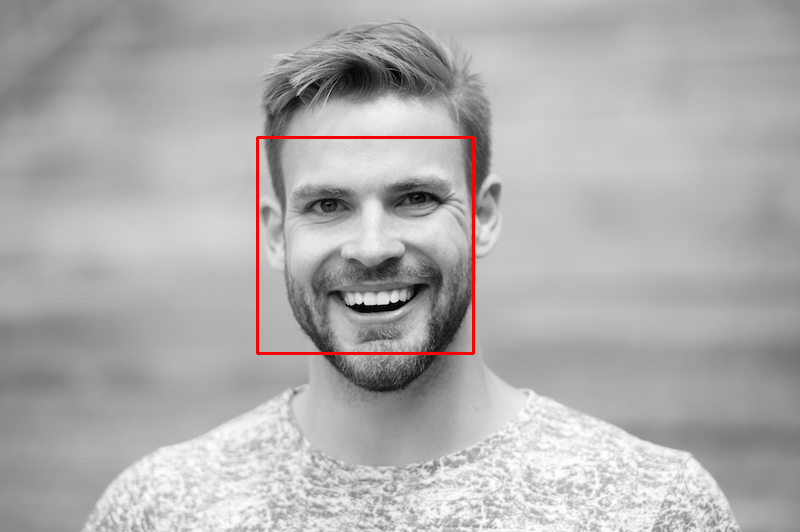

Saved processed image to: processed_images/processed_1.jpeg


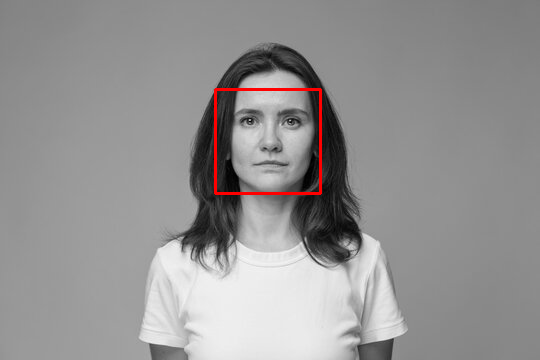

Saved processed image to: processed_images/processed_2.jpg


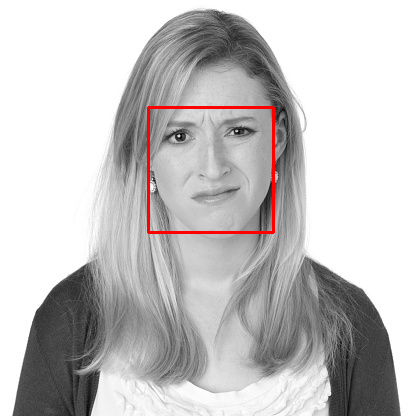

Saved processed image to: processed_images/processed_3.jpg


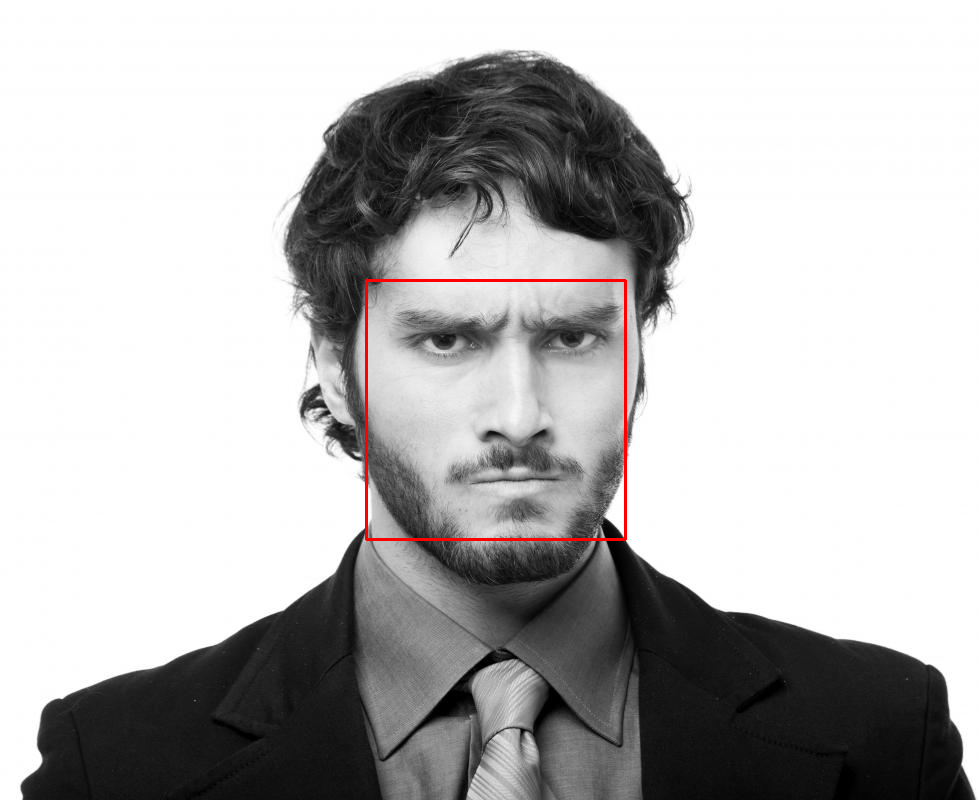

Saved processed image to: processed_images/processed_4.jpg


In [6]:
# Process each image in the folder
for file_name in os.listdir(input_folder):
    file_path = os.path.join(input_folder, file_name)

    try:
        # Read the image
        original_img = cv2.imread(file_path)

        # Convert the image to grayscale first
        gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

        # Detect faces using Dlib's HOG + SVM detector on the grayscale image
        faces = detector(gray_img)

        # Convert the grayscale image back to BGR to draw colored rectangles
        color_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

        # Draw red squares around detected faces on the color version of the grayscale image
        for face in faces:
            x, y, w, h = (face.left(), face.top(), face.width(), face.height())
            cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red color for rectangle

        # Display the final output (grayscale with red rectangles)
        cv2_imshow(color_img)

        # Save the processed image
        output_path = os.path.join(output_folder, f"processed_{file_name}")
        cv2.imwrite(output_path, color_img)
        print(f"Saved processed image to: {output_path}")

    except Exception as e:
        print(f"Failed to process {file_name}: {e}")


In [7]:
# Download links for processed images
print("Processed files are ready for download:")
for processed_file in os.listdir(output_folder):
    files.download(os.path.join(output_folder, processed_file))

Processed files are ready for download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>